## sklearn.datasets.make_classification
* sklearn.datasets.make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
* Parameters:
    n_samples : int, default=100
    

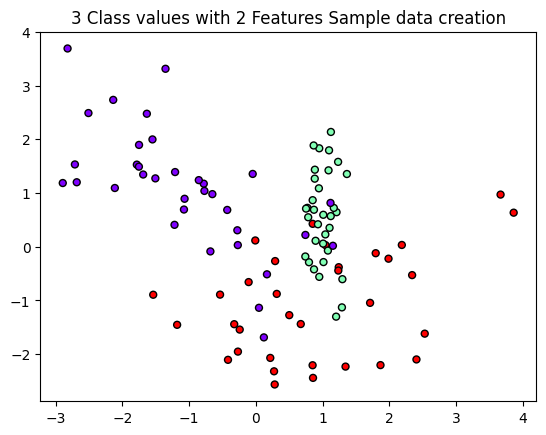

In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature은 2개 결정값 클래스는 3가지 유형의 classfication 샘플 데이터 생성
X_features,y_labels= make_classification(n_features=2, n_redundant=0, n_informative=2,n_classes=3,n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 자표 시각화, 각 클래스값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels,s=25,cmap='rainbow', edgecolors='k')

In [7]:
import numpy as np

def visualize_boundary(model,X,y):
    fig,ax= plt.subplots()

    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:,0],X[:,1],c=y,s=25,cmap='rainbow',edgecolors='k',clim=(y.min(),y.max()),zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start,xlim_end = ax.get_xlim()
    ylim_start,ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training데이타로 model 학습
    model.fit(X,y)

    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx,yy = np.meshgrid(np.linspace(xlim_start,xlim_end,num=200), np.linspace(xlim_start,xlim_end,num=200))
    Z=model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

    # contourf() 이용하여 class boundary를 visulization 수행
    n_classes =len(np.unique(y))
    contours = ax.contourf(xx,yy,Z,alpha=0.3,levels=np.arange(n_classes +1)-0.5,cmap='rainbow',clim=(y.min(),y.max()),zorder=1)

C:\Users\dgh06\AppData\Local\Temp\ipykernel_7216\2220933580.py:22: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx,yy,Z,alpha=0.3,levels=np.arange(n_classes +1)-0.5,cmap='rainbow',clim=(y.min(),y.max()),zorder=1)


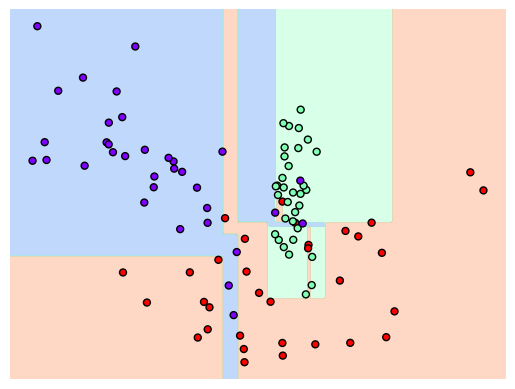

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier(random_state=42).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

C:\Users\dgh06\AppData\Local\Temp\ipykernel_7216\2220933580.py:22: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx,yy,Z,alpha=0.3,levels=np.arange(n_classes +1)-0.5,cmap='rainbow',clim=(y.min(),y.max()),zorder=1)


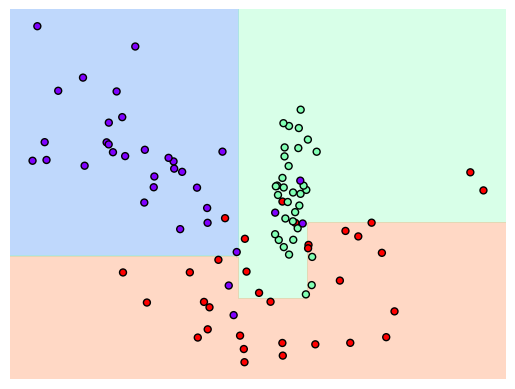

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier(random_state=42,min_samples_leaf=6).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

# Decision Tree 실습 - 사용자 행동 인식 데이터 세트

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음 
feature_name_df=pd.read_csv("../datasets/features.txt",sep='\s+',header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고 , 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [2]:
feature_dup_df =feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [3]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    feature_dup_df=feature_dup_df.reset_index()
    new_feature_name_df= pd.merge(old_feature_name_df.reset_index(),feature_dup_df, how='outer')
    new_feature_name_df['column_name']= new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)

    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [4]:
def get_human_dataset():
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백문자를 sep으로 할당
    feature_name_df = pd.read_csv('../datasets/features.txt', sep='\s+',
                                                     header=None, names=['column_index', 'column_name'])
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 반환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터세트와 테스트 피처 데이터를 데이터프레임으로 로딩
    # 컬럼명은 feature_name 적용
    X_train = pd.read_csv('../datasets/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('../datasets/X_test.txt', sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 데이터 프레임으로 로딩, 컬럼명은 action으로 부여
    y_train = pd.read_csv('../datasets/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('../datasets/y_test.txt', sep='\s+', header=None, names=['action'])
    
    # 로드된 학습/테스트용 데이터프레임을 모두 반환
    return X_train, X_test, y_train, y_test

In [5]:
X_train,X_test,y_train,y_test= get_human_dataset()

In [30]:
print('## 학습 피처 데이터셋 info()')
X_train.info()

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [28]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred= dt_clf.predict(X_test)
accuracy= accuracy_score(y_test,pred)
print(f'결정 트리 예측 정확도:{accuracy:.4f}')

print('DecisionTreeClassifier 기본 하이퍼 파라미터\n', dt_clf.get_params())

결정 트리 예측 정확도:0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [7]:
from sklearn.model_selection import GridSearchCV

params={
    'max_depth' : [6,8,10,12,16,20,24]
}

grid_cv=GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print(f"GridSearchCV 최고 평균 정확도 수치{grid_cv.best_score_:.4f}")
print("GridSearchCV 최적 하이퍼 파라미터:", grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [38]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [39]:
max_depths=[6,8,10,12,16,20,24]

for depth in max_depths:
    dt_clf =DecisionTreeClassifier(max_depth=depth,random_state=156)
    dt_clf.fit(X_train,y_train)
    pred=dt_clf.predict(X_test)
    accuracy=accuracy_score(y_test,pred)
    print(f'max_depth={depth:f} 정확도{accuracy:.4f}')

max_depth=6.000000 정확도0.8558
max_depth=8.000000 정확도0.8707
max_depth=10.000000 정확도0.8673
max_depth=12.000000 정확도0.8646
max_depth=16.000000 정확도0.8575
max_depth=20.000000 정확도0.8548
max_depth=24.000000 정확도0.8548


In [41]:
params={
    'max_depth': [8,12,16,20],
    'min_samples_split': [16,24]
}

grid_cv=GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print(f"GridSearchCV 최고 평균 정확도 수치{grid_cv.best_score_:.4f}")
print("GridSearchCV 최적 하이퍼 파라미터:", grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [42]:
best_dt_clf =grid_cv.best_estimator_
pred1= best_dt_clf.predict(X_test)
accuracy= accuracy_score(y_test,pred1)
print(f'결정 트리 예츨 정확도:{accuracy:.4f}')

결정 트리 예츨 정확도:0.8717


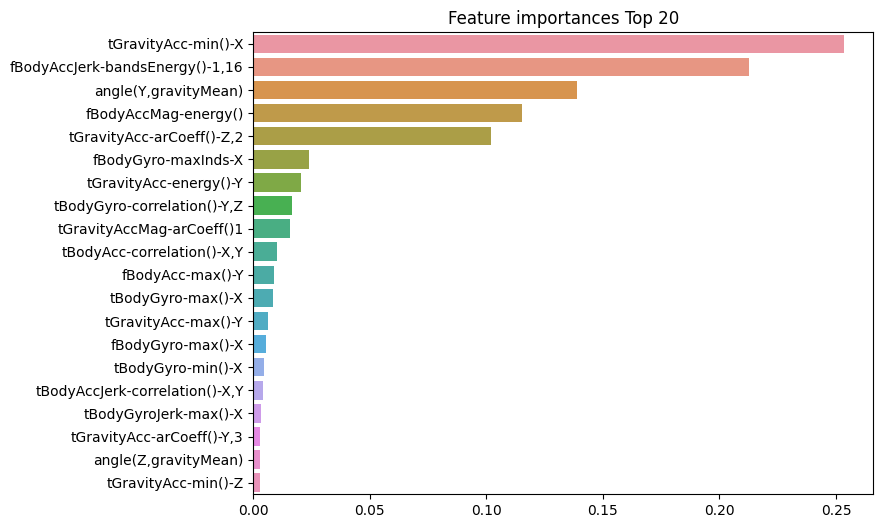

In [44]:
import seaborn as sns

ftr_importance_values= best_dt_clf.feature_importances_
ftr_importances= pd.Series(ftr_importance_values, index=X_train.columns)

ftr_top20 =ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y= ftr_top20.index)
plt.show()